In [76]:
# Don
# Dr. Ofori
# 4 October 2023
# DSC - 510
link: 'https://youtu.be/4wlk311ZAGM'

In [54]:
import math
import matplotlib.pyplot as plt

In [ ]:
_='''
Consider a state lottery and the probability of winning the grand prize. The game is played by selecting a group of 6 numbers from {1, 2, 3, ..., 51}, 
and the state selects a group of 6 numbers from the same set. You win the grand prize if all 6 of your numbers match the state's. 
The probability of winning is so low that some people are trying different ways of increasing their odds.
'''

In [52]:
_='''
# Task 1: Identify whether the probability of winning is discrete or continuous. Write a Python function that calculates the probability 
of winning the grand prize for the new game, given that a group of 6 numbers are selected from {1, 2, 3, ..., 51}. 
'''

#Discrete probability is used when the set of possible outcomes is countable
#In the context of the state lottery game described, the outcome is based on a countable number of possibilities 
#(different combinations of 6 numbers selected from 51). Therefore, the probability of winning the lottery is a discrete probability

#The total number of ways to choose 6 numbers from a set of 51... combination formula: (without replacement) 
# C(n,r) = (n!) / (r!(n-r)!) ; n = total number of items in the set (51 in this case) r =  number of items we want to select (6 in this case)

# Only one number can win so, Probability = 1 / (C(51,6))

# Function

def combinations(n, r):
    #Calculate the number of combinations of r elements from a set of n elements
    return math.factorial(n) / (math.factorial(r) * math.factorial(n - r))

def winning_probability():
    #Calculate the probability of selecting the winning 6 numbers from a set of 51
    total_combinations = combinations(51, 6)
    return 1 / total_combinations

#print(f"{combinations(51,6):,}")
print(winning_probability())


5.552637336155554e-08


In [64]:
_='''
# Task 2: Alexandra buys 1 ticket every 24 hours of every 365 days per year for 80 years of her life. 
Each ticket costs $5 and she selects her numbers independently from one ticket to the next. 
Write a Python program that calculates the probability of Alexandra winning the lottery 
at least one time and the amount of money she spends trying.
'''

def money_spent():
    cost_per_ticket = 5
    tickets_per_year = 365
    years = 80
    
    total_spent = cost_per_ticket * tickets_per_year * years
    return(total_spent)

amount_spent = money_spent()
#print(amount_spent)
print(f"Amount of money Alexandra spends trying to win lottery over 80 years: ${amount_spent:,}")

# Assumption: Every time Alexandra buys a ticket, she has the same probability of winning 
# as she did with any previous ticket, and that each ticket's outcome is independent of all others.
#complement rule (easier)

def alexandra_winning_at_least_once():
    not_winning_single = 1 - winning_probability()
    not_winning_all = not_winning_single ** 29200
    return 1 - not_winning_all

probability_at_least_once = alexandra_winning_at_least_once()
print(f"Probability of Alexandra winning at least once in 80 years: {probability_at_least_once:.10}")
#print(f"Probability of Alexandra winning at least once in 80 years: {probability_at_least_once * 100:.2f}%")


Amount of money Alexandra spends trying to win lottery over 80 years: $146,000
Probability of Alexandra winning at least once in 80 years: 0.001620056437


In [69]:
_=''' 
# Task 3: Amir decides to increase his chance of winning by organizing N of his friends to buy one ticket each for this week's drawing. 
Each friend buys a ticket independently, and the minimum value of N (Nmin(epsilon)) to ensure that the probability that there is 
at least one winner among the group is greater than or equal to epsilon needs to be calculated for various values of epsilon. 
Write a Python function that calculates the value of Nmin(epsilon) for epsilon = 10-5, 10-3, 0.1, and 0.5.
'''

def Nmin(epsilon):
    p = winning_probability()
    N = 1  # Start with 1 friend
    while 1 - (1-p) ** N < epsilon: #The loop continues until the probability of at least one win among N tickets is greater than or equal to epsilon
        N += 1  # Increase the number of friends until the condition is met
    return N

epsilons = [1e-5, 1e-3, 0.1, 0.5]
results = {epsilon: Nmin(epsilon) for epsilon in epsilons}

for epsilon, N in results.items():
    print(f"For epsilon = {epsilon}, Nmin is: {N:,}")

For epsilon = 1e-05, Nmin is: 181
For epsilon = 0.001, Nmin is: 18,019
For epsilon = 0.1, Nmin is: 1,897,486
For epsilon = 0.5, Nmin is: 12,483,207


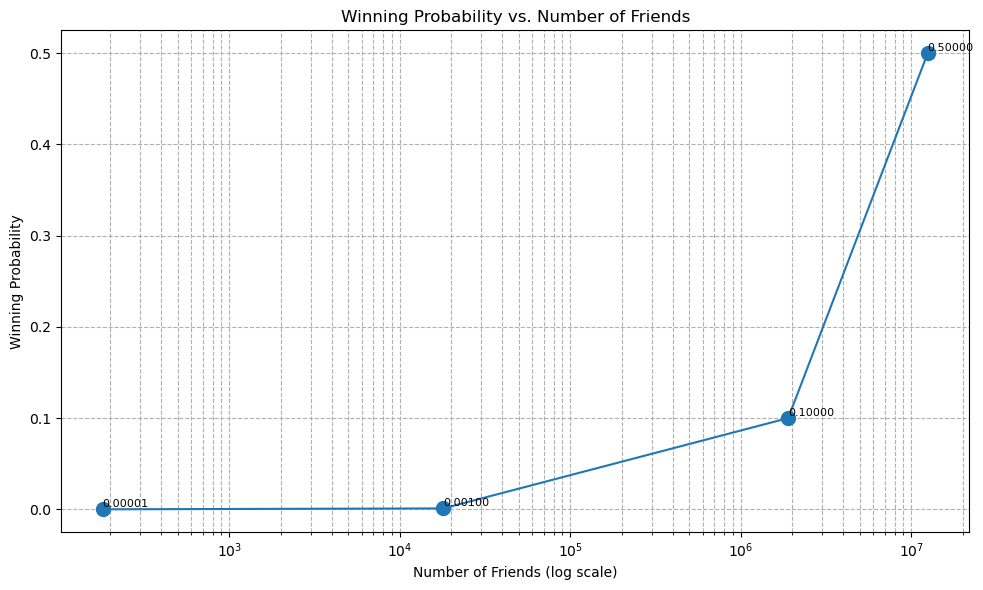

In [58]:
import matplotlib.pyplot as plt

# Extracting epsilon and N values
epsilon_values = list(results.keys())
N_values = list(results.values())

# Plotting
plt.figure(figsize=(10,6))
plt.plot(N_values, epsilon_values, '-o', markersize=10)
plt.xscale('log')  # Setting x-axis to log scale for better visualization
plt.xlabel('Number of Friends (log scale)')
plt.ylabel('Winning Probability')
plt.title('Winning Probability vs. Number of Friends')
plt.grid(True, which="both", ls="--")

# Annotating each point with its epsilon value
for i, txt in enumerate(epsilon_values):
    plt.annotate(f"{txt:.5f}", (N_values[i], epsilon_values[i]), fontsize=8, verticalalignment='bottom')

plt.tight_layout()
plt.show()


In [37]:
_='''
# Task 4: If Amir has gathered enough friends to win with probability 0.5 using the above strategy, write a Python program that determines
 a way that they can increase their win probability above 0.5 without adding more people to the group.
'''
# Making sure there are no duplicate tickets

num_friends_for_0_5_probability = results[0.5]  # This gives us 12483207

def probability_with_unique_tickets(num_tickets):
    #Calculate the probability of winning with unique tickets
    total_combinations = combinations(51, 6)
    return num_tickets / total_combinations

new_probability = probability_with_unique_tickets(num_friends_for_0_5_probability)

print(f"Probability of winning with {num_friends_for_0_5_probability} unique tickets: {new_probability:.10f}")


Probability of winning with 12483207 unique tickets: 0.6931472126


In [71]:
_='''
Task 5: 
The state lottery commissioner introduces a consolation prize: If exactly 3 of your 6 numbers match any 3 of the state's, you win a smaller prize. 
Write a Python program that calculates the probability of winning the consolation prize and the expected value of the consolation prize. 
Is this consolation prize likely to increase sales?
'''

#calculate the probability of getting exactly 3 numbers right.
#Compute the expected value of the consolation prize.
#Discuss if this is likely to increase sales.

# P(3 correct) = (C(6,3) x C(45,3)) / (C(51,6))
# The expected value (EV) is the probability of an event occurring multiplied by the amount you stand to win
# EV = P(3 correct) × A (amount A of the consolation prizes)

#Discussion on sales: The introduction of a consolation prize will increase the chances of winning something, even if it is not the grand prize. 
#This makes the lottery more appealing and rewarding to potential players as the perceived chance of winning increases, boosting sales.

#using combinations from above

def consolation_prize_probability():
    #Calculate the probability of winning the consolation prize
    correct_numbers = combinations(6, 3)
    incorrect_numbers = combinations(45, 3)
    total_combinations = combinations(51, 6)
    return (correct_numbers * incorrect_numbers) / total_combinations

def expected_value(consolation_amount):
    #Calculate the expected value of the consolation prize
    return consolation_prize_probability() * consolation_amount

# Assuming the consolation prize is $5000 (you can change this value)
consolation_amount = 5000
probability = consolation_prize_probability()
ev = expected_value(consolation_amount)

print(f"Probability of winning the consolation prize: {probability:.10f}")
print(f"Expected value of the consolation prize: ${ev:.2f}")



Probability of winning the consolation prize: 0.0157583848
Expected value of the consolation prize: $78.79


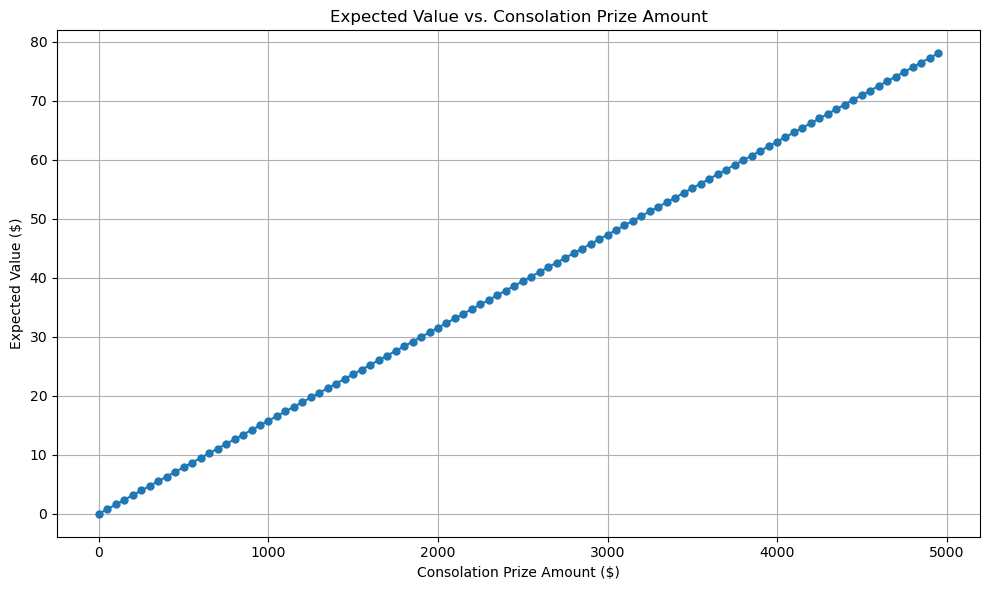

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range for the consolation prize amounts (e.g., from $0 to $2000 in increments of $50)
prize_amounts = np.arange(0, 5000, 50)

# Calculate the expected values for each prize amount
expected_values = [expected_value(amount) for amount in prize_amounts]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(prize_amounts, expected_values, '-o', markersize=5)
plt.xlabel('Consolation Prize Amount ($)')
plt.ylabel('Expected Value ($)')
plt.title('Expected Value vs. Consolation Prize Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# EV=P×A linear relationship

In [73]:
# YouTube link: https://youtu.be/4wlk311ZAGM

# Reference(s): N/A